In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.csv')
iris.drop(['Id'], axis = 1, inplace=True)
iris['Specie'] = iris['Species'].str[5:20]
iris.drop(['Species'], axis = 1, inplace=True)
iris.rename(columns={'Specie':'Species'}, inplace=True)
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Using pair plot for exploring correlations between multidimensional data, to plt all pairs againsteach other

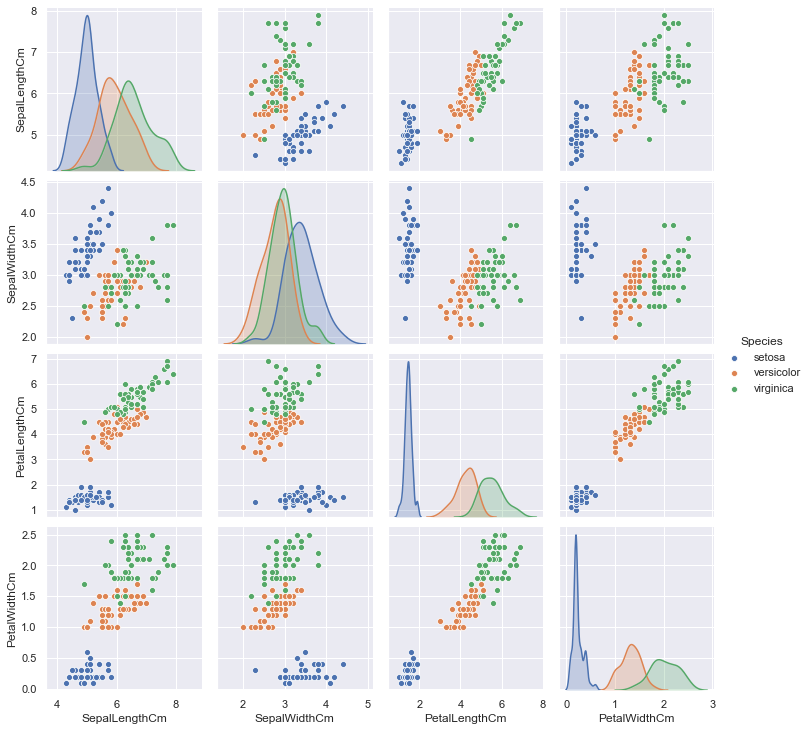

In [3]:
 # Visualizing multidimensional relationship
sns.pairplot(iris, hue='Species', height=2.5);

### Now let us see how the length and width vary according to the species

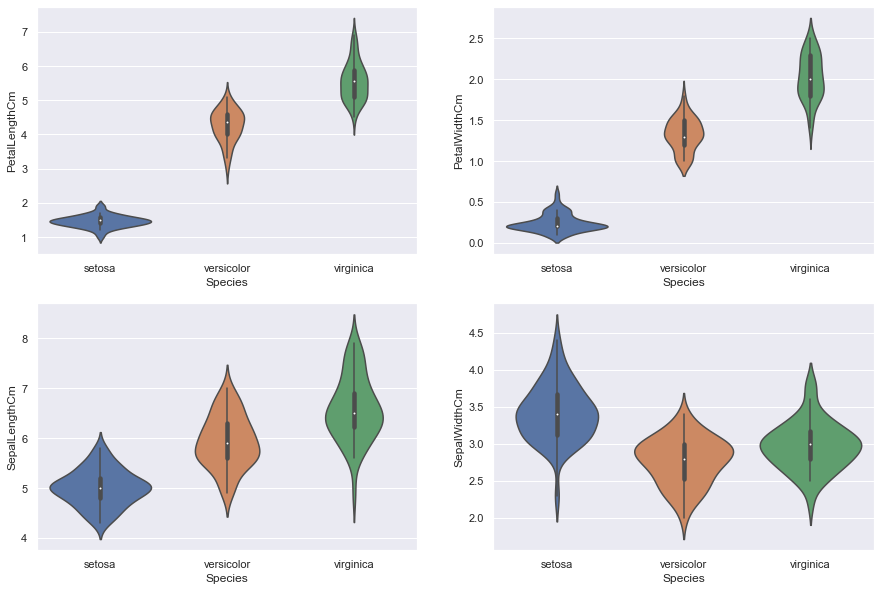

In [4]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

In [5]:
# EXtract feature matrix and target array from the df
X = iris.drop('Species', axis = 1)
X.shape

(150, 4)

In [6]:
# target array usually 1-D 
y = iris['Species']
y.shape

(150,)

## Train and test on the same dataset
- This method is not suggested since the end goal is to predict iris species using a dataset the model has not seen before.
- There is also a risk of overfitting the training data.

## Split the dataset into a training set and a testing set

### Advantages
- By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
- This ensures that we won't use the same observations in both sets.
- More flexible and faster than creating a model using all of the dataset for training.

### Disadvantages
- The accuracy scores for the testing set can vary depending on what observations are in the set. 
- This disadvantage can be countered using k-fold cross-validation.

### Notes
- The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
- As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
- If a model is too complex or not complex enough, the testing accuracy is lower.
- For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [9]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.naive_bayes import GaussianNB # Gaussian naive Bayes, preceeds by assuming each class is drawn from an ax, ih has no hyperparameter to choose, its often a good model to use as a baseline classification

### Support Vector Machine (SVM)

In [10]:
model = svm.SVC() #select the algorithm
model.fit(X_train,y_train) # we train the algorithm with the training data and the training output
prediction=model.predict(X_test) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9833333333333333


SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

### Logistic Regression

In [11]:
model = LogisticRegression() 
model.fit(X_train,y_train) 
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is: 0.9833333333333333


### Decision Tree

In [12]:
model = DecisionTreeClassifier() 
model.fit(X_train,y_train) 
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is: 0.9666666666666667


### K-Nearest Neighbour

In [13]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train,y_train) 
prediction=model.predict(X_test)
print('The accuracy of the KNN is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is: 0.9833333333333333


### Gaussian 

In [14]:
model=GaussianNB()
model.fit(X_train,y_train) 
prediction=model.predict(X_test)
print('The accuracy of the Gaussian is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the Gaussian is: 0.9666666666666667


### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

### Creating Petals And Sepals Training Data 

In [15]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [16]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
X_train_p=train_p[['PetalWidthCm','PetalLengthCm']]
y_train_p=train_p.Species
X_test_p=test_p[['PetalWidthCm','PetalLengthCm']]
y_test_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
X_train_s=train_s[['SepalWidthCm','SepalLengthCm']]
y_train_s=train_s.Species
X_test_s=test_s[['SepalWidthCm','SepalLengthCm']]
y_test_s=test_s.Species

### SVM

In [17]:
model=svm.SVC()
model.fit(X_train_p,y_train_p) 
prediction=model.predict(X_test_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,y_test_p))

model=svm.SVC()
model.fit(X_train_s,y_train_s) 
prediction=model.predict(X_test_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,y_test_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


### Logistic Regression

In [18]:
model = LogisticRegression()
model.fit(X_train_p,y_train_p) 
prediction=model.predict(X_test_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,y_test_p))

model.fit(X_train_s,y_train_s) 
prediction=model.predict(X_test_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,y_test_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


### Decision Tree

In [19]:
model=DecisionTreeClassifier()
model.fit(X_train_p,y_train_p) 
prediction=model.predict(X_test_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,y_test_p))

model.fit(X_train_s,y_train_s) 
prediction=model.predict(X_test_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,y_test_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


### K-Nearest Neighbours

In [20]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train_p,y_train_p) 
prediction=model.predict(X_test_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,y_test_p))

model.fit(X_train_s,y_train_s) 
prediction=model.predict(X_test_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,y_test_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


### Gaussian

In [21]:
model=GaussianNB()
model.fit(X_train_p,y_train_p) 
prediction=model.predict(X_test_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,y_test_p))

model.fit(X_train_s,y_train_s) 
prediction=model.predict(X_test_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,y_test_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.8


### Observations:

 - Using Petals over Sepal for training the data gives a much better accuracy.
 - This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high. 